In [1]:
# based on: https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter03_introduction-to-keras-and-tf.ipynb
# presented here in accordance with the MIT license

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [4]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [5]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

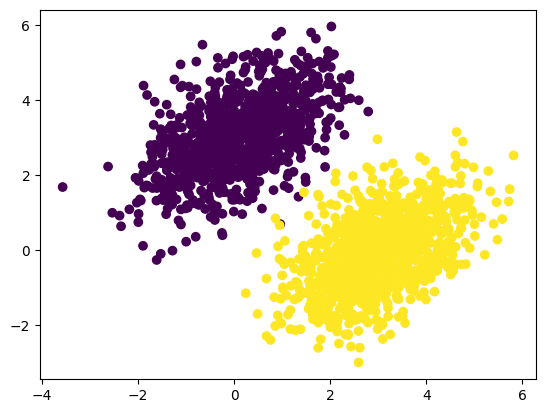

In [6]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [7]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [8]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [9]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [10]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [11]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.2157
Loss at step 1: 0.1938
Loss at step 2: 0.1037
Loss at step 3: 0.0879
Loss at step 4: 0.0815
Loss at step 5: 0.0766
Loss at step 6: 0.0722
Loss at step 7: 0.0682
Loss at step 8: 0.0645
Loss at step 9: 0.0611
Loss at step 10: 0.0580
Loss at step 11: 0.0551
Loss at step 12: 0.0525
Loss at step 13: 0.0501
Loss at step 14: 0.0479
Loss at step 15: 0.0459
Loss at step 16: 0.0440
Loss at step 17: 0.0423
Loss at step 18: 0.0408
Loss at step 19: 0.0393
Loss at step 20: 0.0380
Loss at step 21: 0.0368
Loss at step 22: 0.0357
Loss at step 23: 0.0347
Loss at step 24: 0.0338
Loss at step 25: 0.0329
Loss at step 26: 0.0321
Loss at step 27: 0.0314
Loss at step 28: 0.0308
Loss at step 29: 0.0302
Loss at step 30: 0.0296
Loss at step 31: 0.0291
Loss at step 32: 0.0286
Loss at step 33: 0.0282
Loss at step 34: 0.0278
Loss at step 35: 0.0274
Loss at step 36: 0.0271
Loss at step 37: 0.0268
Loss at step 38: 0.0265
Loss at step 39: 0.0263


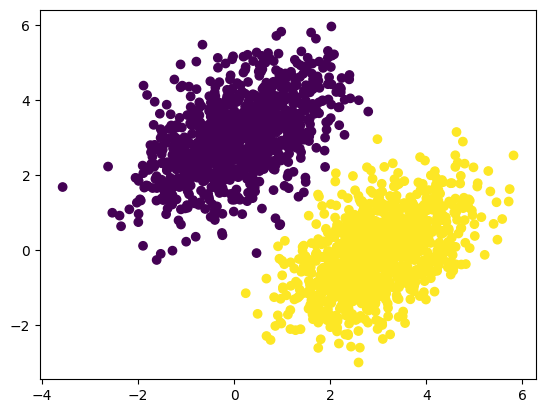

In [12]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

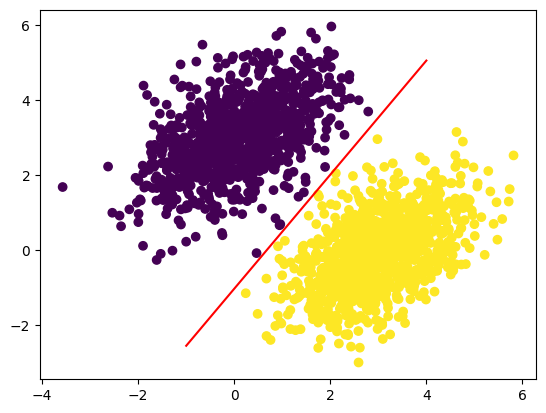

In [13]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)